### 网络科学理论简介
***
***
# 天涯论坛的回帖网络分析
***
***

王成军 

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dtt = []
file_path = '../data/tianya_bbs_threads_network.txt'
with open(file_path, 'r') as f:
    for line in f:
        pnum, link, time, author_id, author,\
        content = line.replace('\n', '').split('\t')
        dtt.append([pnum, link, time, author_id, author, content])
len(dtt)

8079

In [3]:
import pandas as pd
dt = pd.DataFrame(dtt)
dt=dt.rename(columns = {0:'page_num', 1:'link', 2:'time', 3:'author',4:'author_name', 5:'reply'})
dt[:5]

,page_num,link,time,author,author_name,reply
0,1,/post-free-2849477-1.shtml,2012-10-29 07:59:00,50499450,贾也,先生是一位真爷们！第161期导语：人人宁波，面朝大海，春暖花开! 宁波的事，怎谈？无从谈，...
1,1,/post-free-2849477-1.shtml,2012-10-29 08:13:54,22122799,三平67,我们中国人都在一条船，颠簸已久，我们都想做宁波人，希望有一个风平浪静的港湾，面朝大海，春暖花...
2,1,/post-free-2849477-1.shtml,2012-10-29 08:27:02,39027950,赶浪头,默默围观~
3,1,/post-free-2849477-1.shtml,2012-10-29 08:43:15,53986501,m408833176,不能收藏？
4,1,/post-free-2849477-1.shtml,2012-10-29 08:55:52,39073643,兰质薰心,楼主好文！ 相信政府一定有能力解决好这些问题.


In [8]:
# extract date from datetime
date = [i[:10] for i in dt.time]
dt['date'] = pd.to_datetime(date)

In [9]:
dt[:5]

,page_num,link,time,author,author_name,reply,date
0,1,/post-free-2849477-1.shtml,2012-10-29 07:59:00,50499450,贾也,先生是一位真爷们！第161期导语：人人宁波，面朝大海，春暖花开! 宁波的事，怎谈？无从谈，...,2012-10-29
1,1,/post-free-2849477-1.shtml,2012-10-29 08:13:54,22122799,三平67,我们中国人都在一条船，颠簸已久，我们都想做宁波人，希望有一个风平浪静的港湾，面朝大海，春暖花...,2012-10-29
2,1,/post-free-2849477-1.shtml,2012-10-29 08:27:02,39027950,赶浪头,默默围观~,2012-10-29
3,1,/post-free-2849477-1.shtml,2012-10-29 08:43:15,53986501,m408833176,不能收藏？,2012-10-29
4,1,/post-free-2849477-1.shtml,2012-10-29 08:55:52,39073643,兰质薰心,楼主好文！ 相信政府一定有能力解决好这些问题.,2012-10-29


In [10]:
import pandas as pd

df = pd.read_csv('../data/tianya_bbs_threads_list.txt', sep = "\t", header=None)
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:2]

,title,link,author,author_page,click,reply,time
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41


In [11]:
from collections import defaultdict

link_user_dict = defaultdict(list)
for i in range(len(dt)):
    link_user_dict[dt.link[i]].append(dt.author[i])

In [12]:
df['user'] = [len(link_user_dict[l]) for l in df.link]
df[:2] 

,title,link,author,author_page,click,reply,time,user
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59,2478
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41,830


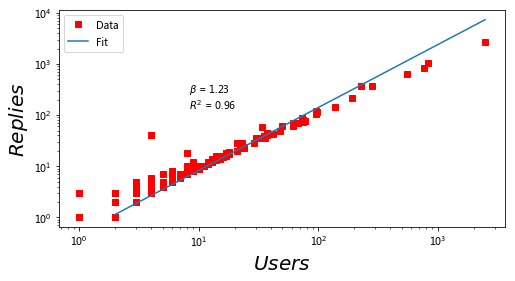

In [13]:
import statsmodels.api as sm
import numpy as np

x = np.log(df.user+1)
y = np.log(df.reply+1)
xx = sm.add_constant(x, prepend=True)
res = sm.OLS(y,xx).fit()
constant,beta = res.params
r2 = res.rsquared
fig = plt.figure(figsize=(8, 4),facecolor='white')
plt.plot(df.user, df.reply, 'rs', label= 'Data')
plt.plot(np.exp(x), np.exp(constant + x*beta),"-", label = 'Fit')
plt.yscale('log');plt.xscale('log')
plt.xlabel(r'$Users$', fontsize = 20)
plt.ylabel(r'$Replies$', fontsize = 20)
plt.text(max(df.user)/300,max(df.reply)/20,
         r'$\beta$ = ' + str(round(beta,2)) +'\n' + r'$R^2$ = ' + str(round(r2, 2)))
plt.legend(loc=2,fontsize=10, numpoints=1)
plt.axis('tight')
plt.show()

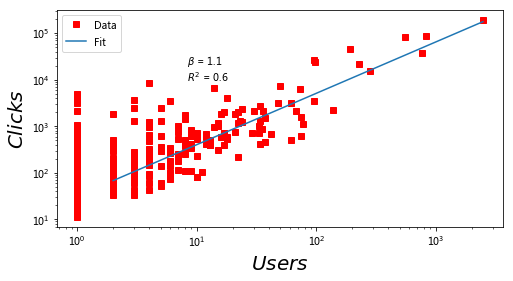

In [14]:
x = np.log(df.user+1)
y = np.log(df.click+1)
xx = sm.add_constant(x, prepend=True)
res = sm.OLS(y,xx).fit()
constant,beta = res.params
r2 = res.rsquared
fig = plt.figure(figsize=(8, 4),facecolor='white')
plt.plot(df.user, df.click, 'rs', label= 'Data')
plt.plot(np.exp(x), np.exp(constant + x*beta),"-", label = 'Fit')
plt.yscale('log');plt.xscale('log')
plt.xlabel(r'$Users$', fontsize = 20)
plt.ylabel(r'$Clicks$', fontsize = 20)
plt.text(max(df.user)/300,max(df.click)/20,
         r'$\beta$ = ' + str(round(beta,2)) +'\n' + r'$R^2$ = ' + str(round(r2, 2)))
plt.legend(loc=2,fontsize=10, numpoints=1)
plt.axis('tight')
plt.show()

In [15]:
# convert str to datetime format
dt.time = pd.to_datetime(dt.time)
dt['month'] = dt.time.dt.month
dt['year'] = dt.time.dt.year
dt['day'] = dt.time.dt.day
type(dt.time[0])

pandas.tslib.Timestamp

In [16]:
d = dt.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
ds = dd.cumsum()

In [18]:
def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(list(dat_date_str))
    return dat_date

ds.date = getDate(ds)
dd.date = getDate(dd)

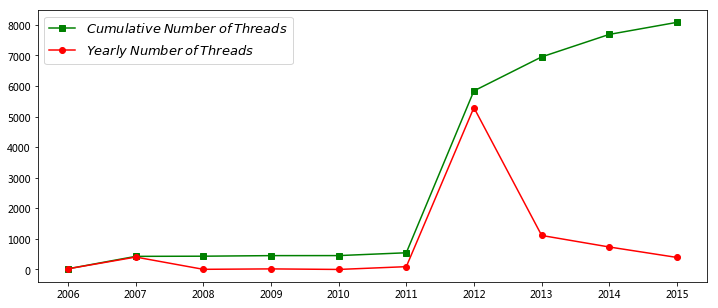

In [19]:
fig = plt.figure(figsize=(12,5))
plt.plot(ds.date, ds.year, 'g-s', label = '$Cumulative\: Number\:of\: Threads$')
plt.plot(dd.date, dd.year, 'r-o', label = '$Yearly\:Number\:of\:Threads$')
#plt.yscale('log')
plt.legend(loc=2,numpoints=1,fontsize=13)
plt.show()

# Extract @ 

In [20]:
dt.reply[:55]

0     先生是一位真爷们！第161期导语：人人宁波，面朝大海，春暖花开!　　宁波的事，怎谈？无从谈，...
1     我们中国人都在一条船，颠簸已久，我们都想做宁波人，希望有一个风平浪静的港湾，面朝大海，春暖花...
2                                                 默默围观~
3                                                 不能收藏？
4                              楼主好文！　　相信政府一定有能力解决好这些问题.
5                                                人民在觉醒。
6                                          理性的文字，向楼主致敬！
7                                     呼唤变革,人民需要的是服务型政府！
8                                      顶贾兄！让我们携手努力保卫家园！
9                                        围观就是力量,顶起就有希望.
10                                       文章写得太有力量了，支持你！
11    @贾也 2012-10-29 7:59:00　　导语：人人宁波，面朝大海，春暖花开　　......
12                                   中国人从文盲走向民粹，实在是太快了。
13                               杀死娘胎里的，毒死已出生的，这个社会怎么了？
14                                                    3
15    环境比什么都可贵，每一次呼吸，每一顿粮食，都息息相关，若任其恶化，而无从改观，那遑谈国家之未...
16                                                 写的很好
17    未来这里将是全球最大的垃圾场，而他们早已放浪西方。苟活的将面临数不清的癌症，无助的死

@贾也2012-10-297:59:00　　导语：人人宁波，面朝大海，春暖花开　　........

        @兰质薰心2012-10-2908:55:52　　楼主好文！　　相信政府一定有能力解决好这些...
        
                回复第20楼，@rual_f　　“我相信官场中，许多官员应该葆有社会正能量”　　通篇好文，顶...

In [21]:
import re
tweet = u"//@lilei: dd //@Bob: cc//@Girl: dd//@魏武: \
    利益所致 自然念念不忘// @诺什: 吸引优质  客户，摆脱屌丝男！！！//@MarkGreene: 转发微博"
RTpattern = r'''//?@(\w+)'''
for word in re.findall(RTpattern, tweet, re.UNICODE):
    print(word)

lilei
Bob
Girl
魏武
MarkGreene


In [25]:
print(dt.reply[11])

@贾也 2012-10-29 7:59:00　　导语：人人宁波，面朝大海，春暖花开　　...........　　-----------------------------　　顶贾兄！　　充分说明：莫言或诺贝尔，名至实归！


In [26]:
RTpattern = r'''@(\w+)\s'''
re.findall(RTpattern, dt.reply[11], re.UNICODE)

['贾也']

In [27]:
if re.findall(RTpattern, dt.reply[0], re.UNICODE):
    print(True)
else:
    print(False)

False


In [28]:
for k, tweet in enumerate(dt.reply[:100]):
#     tweet = tweet.decode('utf8')
    RTpattern = r'''@(\w+)\s'''
    for person in re.findall(RTpattern, tweet, re.UNICODE):
        print(k,'\t',dt.author_name[k],'\t', person,'\t\t', tweet[:30])

11 	 木兰清风_ 	 贾也 		 @贾也 2012-10-29 7:59:00　　导语：人人宁
30 	 此东西非南北 	 rual_f 		 回复第20楼，@rual_f　　“我相信官场中，许多官员应该
46 	 弱水三千chen 	 兰质薰心 		 @兰质薰心 2012-10-29 08:55:52　　楼主好
53 	 彼得与梦想 	 昊爷7 		 @昊爷7 2012-10-29 11:19:29　　杂谈的低
66 	 lenglengjing 	 蒙上眼睛的牛 		 @蒙上眼睛的牛 2012-10-29 10:15:56　　未
67 	 AGy戰女 	 天时怼兮威灵怒 		 @天时怼兮威灵怒 66楼 　　http://baike.ba
69 	 我真的要说吗 	 香湖人 		 @香湖人 27楼 　　　　-----------------
71 	 2011我为卿狂 	 shdsb 		 @shdsb 2012-10-29 10:17:43　　媒体
72 	 无色天空FRANK 	 pals2009 		 @pals2009 48楼 　　每次看到这样的消息，都很痛心
76 	 gaolihshq 	 兰质薰心 		 作者：弱水三千chen　回复日期：2012-10-29 11
80 	 LBJStream 	 曾开贵 		 @曾开贵 2012-10-29 11:40:09　　没有ZF
93 	 大头菜烤年糕 	 横冲节度使 		 @横冲节度使 2012-10-29 12:11:50　　楼主
94 	 xinggzyyc 	 赶浪头 		 @赶浪头 2楼 　　默默围观~　　　　-----------


In [29]:
print(dt.reply[80])

@曾开贵 2012-10-29 11:40:09　　没有ZF，哪来新ZG，没有新ZG，你们吃什么？为什么你们总是要攻击ZF呢，就像之前那样骂骂小日本多好啊……看看台湾，一碗牛肉面竟然卖到100台币一碗，大L都才卖10元一碗，你还不知足！啥，工资不一样？没错，台湾平均工资5万台币能买500碗牛肉面，大L平均工资2000能买200碗牛肉面。但是，小同志，事情没这么简单啊，你能一下吃完500碗面吗？在倡导节约、环保低碳的今天，你不觉得铺张浪费是件可耻...........　　-----------------------------　　叼


In [30]:
link_author_dict = {}
for i in range(len(df)):
    link_author_dict[df.link[i]] =df.author[i] 
    

In [31]:
graph = []
for k, tweet in enumerate(dt.reply):
    url = dt.link[k]
    RTpattern = r'''@(\w+)\s'''
    persons = re.findall(RTpattern, tweet, re.UNICODE)
    if persons:
        for person in persons:
            graph.append([dt.author_name[k], person])
    else:
        graph.append( [dt.author_name[k], link_author_dict[url]]  )
        

In [32]:
len(graph)

8769

In [33]:
for x, y in graph[:3]:
    print(x, y)

贾也 贾也
三平67 贾也
赶浪头 贾也


In [34]:
import networkx as nx

In [35]:
G = nx.DiGraph()
for x,y in graph:
    if x != y:
        G.add_edge(x,y)


In [36]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 4289\nNumber of edges: 5995\nAverage in degree:   1.3978\nAverage out degree:   1.3978'

In [37]:
GU=G.to_undirected(reciprocal=True)
graphs = list(nx.connected_component_subgraphs(GU))

In [38]:
import numpy as np
size = []
for i in graphs:
    size.append(len(i.nodes()))
len(size), np.max(size)

(4067, 120)

In [39]:
gs = []
for i in graphs:
    if len(i.nodes()) >5:
        gs.append(i)
len(gs)

4

In [40]:
for g in gs:
    print(len(g.nodes()))

6
120
44
9


In [42]:
g_max = gs[1]
len(g_max.nodes())

120

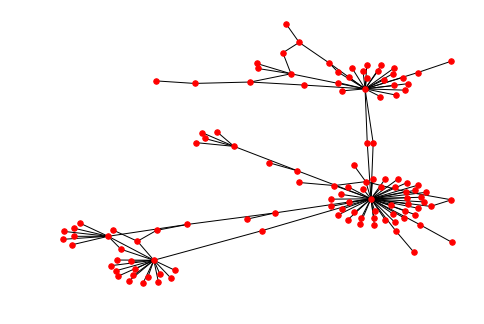

In [43]:
pos = nx.spring_layout(g_max)          
#定义一个布局，此处采用了spectral布局方式，后变还会介绍其它布局方式，注意图形上的区别
nx.draw(g_max,pos,with_labels=False,node_size = 30)  
#绘制规则图的图形，with_labels决定节点是非带标签（编号）,node_size是节点的直径
plt.show()  #显示图形

In [46]:
# with open('../data/tianya_network_120.csv', 'a') as f:
#     for x, y in g_max.edges():
#         f.write(x + ',' + y + '\n')

![](./img/tianyaGephi.png)

# 使用 Gephi进行网络可视化

# 1	/post-free-2849477-1.shtml	2012-10-29 11:11:32	51150428	生生0326	一环　　天涯现在太滞后了，看消息还是得靠微博。太失望了。


# 作业：
- 1. 计算节点的度，并绘制其散点图。
- 2. 计算节点的聚类系数
- 3. 计算节点的pagerank